# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['erenhot',
 'airai',
 'sistranda',
 'mayumba',
 'faanui',
 'atar',
 'mys shmidta',
 'oakley',
 'hagere hiywet',
 'ilulissat',
 'albany',
 'ponta do sol',
 'yellowknife',
 'avarua',
 'rikitea',
 'geraldton',
 'nikolskoye',
 'ushuaia',
 'saint george',
 'attawapiskat',
 'samusu',
 'hobart',
 'maloshuyka',
 'upernavik',
 'bambous virieux',
 'waipawa',
 'barrow',
 'new norfolk',
 'weligama',
 'acari',
 'the valley',
 'port lincoln',
 'belushya guba',
 'jamestown',
 'aykhal',
 'klaksvik',
 'te anau',
 'tuatapere',
 'fenoarivo',
 'mataura',
 'pemangkat',
 'kruisfontein',
 'chokurdakh',
 'bengkulu',
 'khash',
 'neuquen',
 'norman wells',
 'road town',
 'soyo',
 'buri',
 'dunedin',
 'atuona',
 'vaini',
 'najran',
 'bluff',
 'castro',
 'hithadhoo',
 'cape town',
 'havre-saint-pierre',
 'illoqqortoormiut',
 'kamenskoye',
 'mar del plata',
 'bethel',
 'tasiilaq',
 'mount pleasant',
 'teseney',
 'maralal',
 'pevek',
 'east london',
 'fortuna',
 'sao joao da barra',
 'hermanus',
 'nanortalik',
 'p

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# set up lists to hold response info
lat = []
temp = []
hum = []
cloud = []
wind = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Viewing the straight Json
# weather_response = requests.get(query_url + city)
# weather_json = weather_response.json()
# city_id = weather_json["id"]
# city_name = weather_json["name"]



#Error handling

    # Loop through the list of cities and perform a request for data on each
for city in cities:
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        try:
            city_id = weather_json["id"]
            city_name = weather_json["name"]
        # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
    
        
    
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            print(f"Retrieving information for City: {city_name} and City ID is: {city_id} ")
            
        except (KeyError, IndexError):
            print("Missing city... skipping.")
        
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")
# print(f"The humidity information received is: {hum}")
# print(f"The cloudyiness information received is: {cloud}")
# print(f"The wind information received is: {wind}")
# weather_json


Retrieving information for City: Erenhot and City ID is: 2037485 
Retrieving information for City: Airai and City ID is: 1651810 
Retrieving information for City: Sistranda and City ID is: 3139597 
Retrieving information for City: Mayumba and City ID is: 2399001 
Retrieving information for City: Faanui and City ID is: 4034551 
Retrieving information for City: Atar and City ID is: 2381334 
Missing city... skipping.
Retrieving information for City: Oakley and City ID is: 5378566 
Retrieving information for City: Hagere Hiywet and City ID is: 335288 
Retrieving information for City: Ilulissat and City ID is: 3423146 
Retrieving information for City: Albany and City ID is: 5106834 
Retrieving information for City: Ponta do Sol and City ID is: 3453439 
Retrieving information for City: Yellowknife and City ID is: 6185377 
Retrieving information for City: Avarua and City ID is: 4035715 
Retrieving information for City: Rikitea and City ID is: 4030556 
Retrieving information for City: Geraldto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_dict = {
    "Latitude": lat,
    "Temp": temp,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (MPH)": wind
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()    

,Latitude,Temp,Humidity,Cloudiness (%),Wind Speed (MPH)
0,43.65,33.04,38,0,17.62
1,-8.93,81.05,18,67,5.59
2,63.73,43.66,93,40,3.36
3,-3.44,76.77,91,100,5.95
4,-16.48,75.27,77,4,21.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

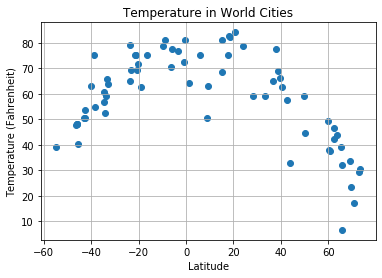

In [41]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

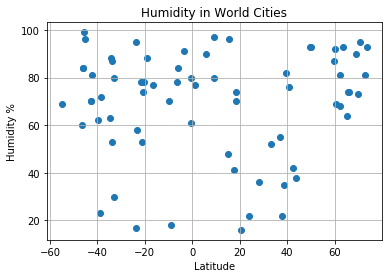

In [42]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

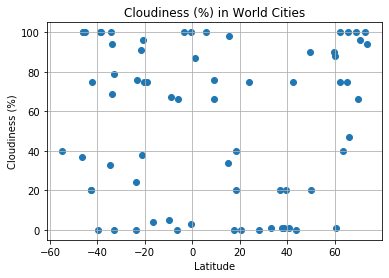

In [43]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness (%) in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

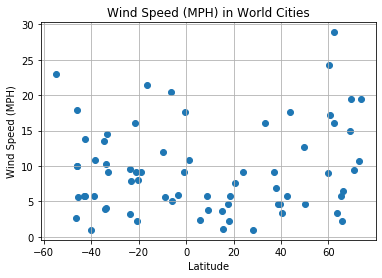

In [44]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (MPH)"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed (MPH) in World Cities")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()